# Лабораторная работа № 2 по курсу ML.
### Выполнил: Салихов Тимур, группа М8О-312Б-22

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fol

TRAIN_FILE_PATH = './nyc-taxi-trip-duration/train.csv'
VALIDATION_FILE_PATH = './nyc-taxi-trip-duration/test.csv'

## Подготовка данных

Загрузим наш датасет:

In [154]:
train_df = pd.read_csv(TRAIN_FILE_PATH)
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


### Избавление от ненужных данных
Такие поля как id и store_and_fwd_flag нам не нужны, так как они очевидно никак не влияют на время поездки, поэтому мы можем просто их дропнуть.

In [155]:
train_df = train_df.drop(columns=['id', 'store_and_fwd_flag'])
train_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,764
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,373


### Избавление от выбросов во времени поездки
Посмотрим на график trip duration.

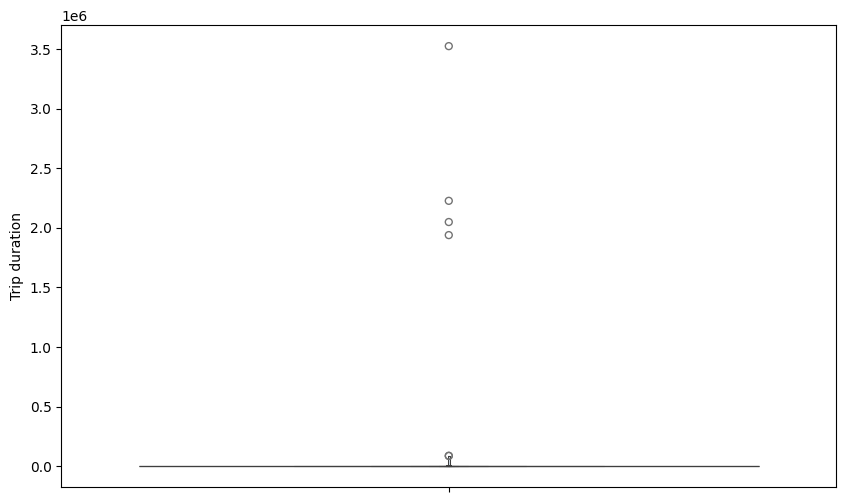

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(data=train_df['trip_duration'], ax=ax)
ax.set_ylabel('Trip duration')
plt.show()

Как видим, в наших данных есть сильные выбросы. Учитывая, что данные представлены по одному городу, длительность поездки вряд ли может превышать 4 часа, поэтому такие записи можно исключить. Также минимальным реалистичным временем поездки выберем 5 минут.

In [157]:
train_df = train_df[(train_df['trip_duration'] >= 5 * 60) & (train_df['trip_duration'] <= 4 * 60 * 60)]
train_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...,...,...
1458638,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,414
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,764


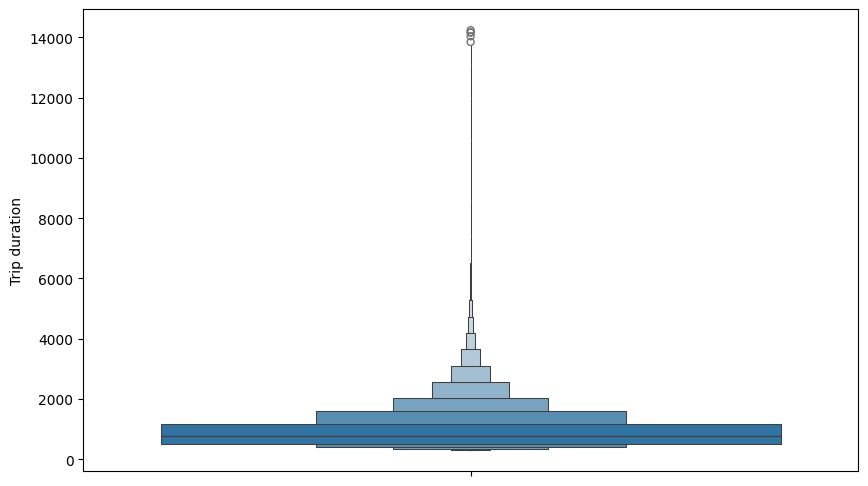

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(data=train_df['trip_duration'], ax=ax)
ax.set_ylabel('Trip duration')
plt.show()

Как видим, картина улучшилась.

### Избавлемся от выбросов в vendor id и passanger count
vendor_id может повлиять на время поездки, так как можно предположить, что в разных компаниях разные автомобили и водители, и время будет различаться между вендорами.

passenger_count также может повлиять на результат, потому что в зависимости от кол-ва пассажиров используются разные машины.

Посмотрим, какие есть данные и постараемся избавиться от выбросов.

In [159]:
vids = train_df['vendor_id'].value_counts().sort_index()
pascnt = train_df['passenger_count'].value_counts().sort_index()
print( vids)
print(pascnt)

vendor_id
1    574436
2    661646
Name: count, dtype: int64
passenger_count
0        12
1    871143
2    181302
3     51751
4     24624
5     66372
6     40877
9         1
Name: count, dtype: int64


В vendor_id выбросов не наблюдается.

В passenger_count наблюдается очевидный выброс 0, так как 0 пассажиров быть не может. 7, 8 и 9 пассажиров можем также считать как выбросы, так как по ним мало данных. 1-6 пассажиров видится реалистичным, так как в такси может быть минивэн.

Уберем выбросы и посмотрим на зависимость таргета от параметров.

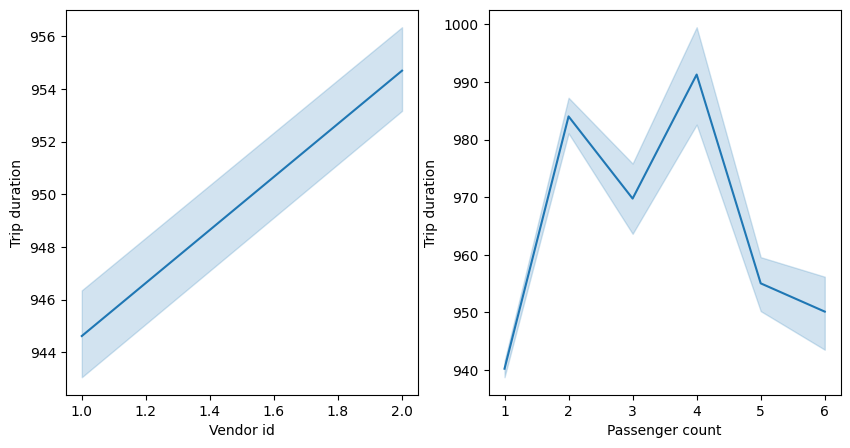

In [160]:
train_df = train_df[(train_df['passenger_count'] >= 1) & (train_df['passenger_count'] <= 6)]

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)

sns.lineplot(x='vendor_id', y='trip_duration', data=train_df, ax=axes[0])
axes[0].set_xlabel('Vendor id')
axes[0].set_ylabel('Trip duration')

sns.lineplot(x='passenger_count', y='trip_duration', data=train_df, ax=axes[1])
axes[1].set_xlabel('Passenger count')
axes[1].set_ylabel('Trip duration')
plt.show()

По графику зависимости для vendor id можно предположить, что этот параметр подходит, однако судя по графику passanger count, данная метрика не подходит для оценки времени в пути. Уберем лишний параметр.

In [161]:
train_df = train_df.drop(columns='passenger_count')
train_df

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...,...
1458638,2,2016-02-02 00:39:39,2016-02-02 00:46:33,-73.988823,40.736553,-73.989166,40.757393,414
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,764


### Исследование зависимости от времени года
В зависимости от времени года меняются погодные условия, что также может отражаться на времени поездок.
Попробуем извлечь из даты заказа месяц и посомотреть на зависимость. 

In [162]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['month'] = train_df['pickup_datetime'].dt.month
train_df

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,3
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,6
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,1
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,4
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,3
...,...,...,...,...,...,...,...,...,...
1458638,2,2016-02-02 00:39:39,2016-02-02 00:46:33,-73.988823,40.736553,-73.989166,40.757393,414,2
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,778,4
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,655,1
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,764,4


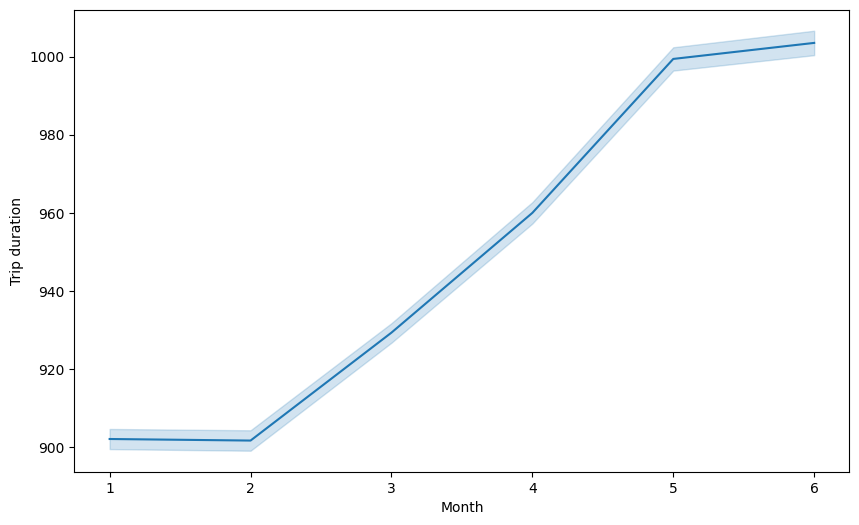

In [163]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='month', y='trip_duration', data=train_df, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Trip duration')
plt.show()


Видим, что месяц действительно может влиять на время поездки.

### Исследование влияния времени суток на длительность поездки
Проверим зависимость времени поездки от времени суток. В зависимости от времени суток в городе могут быть пробки.

In [164]:
train_df['pick_hours'] = train_df['pickup_datetime'].dt.hour
train_df

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,pick_hours
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,3,17
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,6,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,1,11
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,4,19
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,3,13
...,...,...,...,...,...,...,...,...,...,...
1458638,2,2016-02-02 00:39:39,2016-02-02 00:46:33,-73.988823,40.736553,-73.989166,40.757393,414,2,0
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,778,4,13
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,655,1,7
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,764,4,6


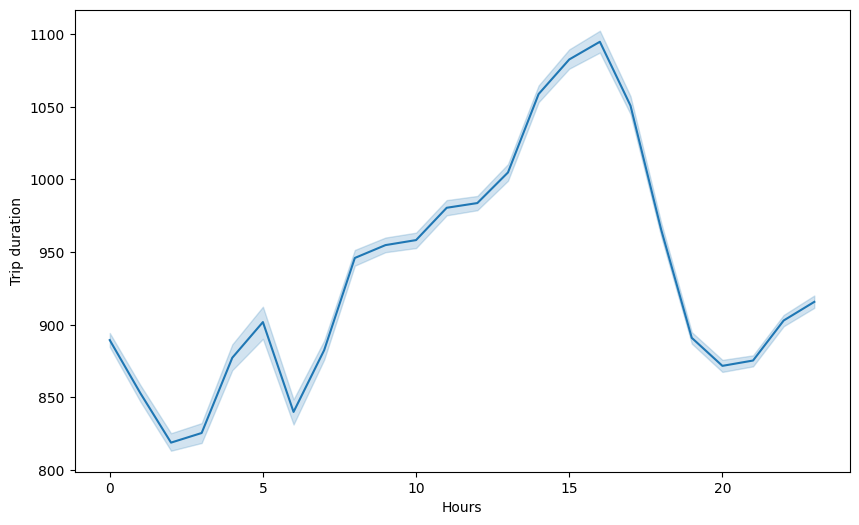

In [165]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='pick_hours', y='trip_duration', data=train_df, ax=ax)
ax.set_xlabel('Hours')
ax.set_ylabel('Trip duration')
plt.show()

Видим, что время посадки также влияет на время в пути.

Из даты и времени больше нельзя извлечь признаки, поэтому их можно убрать.

In [166]:
train_df = train_df.drop(columns=['pickup_datetime', 'dropoff_datetime'])
train_df

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,pick_hours
0,2,-73.982155,40.767937,-73.964630,40.765602,455,3,17
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,0
2,2,-73.979027,40.763939,-74.005333,40.710087,2124,1,11
3,2,-74.010040,40.719971,-74.012268,40.706718,429,4,19
4,2,-73.973053,40.793209,-73.972923,40.782520,435,3,13
...,...,...,...,...,...,...,...,...
1458638,2,-73.988823,40.736553,-73.989166,40.757393,414,2,0
1458639,2,-73.982201,40.745522,-73.994911,40.740170,778,4,13
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,7
1458641,2,-73.959129,40.768799,-74.004433,40.707371,764,4,6


### Подсчет расстояния
Подсчет расстояния по координатам можно производить разными способами.

Попробуем рассчитать расстояние 2 методами:
1. Манхеттенское расстояние,
2. Метод великой окружности

In [167]:
train_df1 = train_df.copy()
train_df1['distance'] = np.abs(train_df1['dropoff_latitude'] - train_df1['pickup_latitude']) * 111.32 + \
                        np.abs(train_df1['dropoff_longitude'] - train_df1['pickup_longitude']) * 111.32 * np.cos(train_df1['pickup_latitude'] * np.pi / 180)
train_df1 = train_df1.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'])

train_df1

,vendor_id,trip_duration,month,pick_hours,distance
0,2,455,3,17,1.737385
1,1,663,6,0,2.433240
2,2,2124,1,11,8.212803
3,2,429,4,19,1.663200
4,2,435,3,13,1.200806
...,...,...,...,...,...
1458638,2,414,2,0,2.348833
1458639,2,778,4,13,1.667769
1458640,1,655,1,7,8.067645
1458641,2,764,4,6,10.657620


In [168]:
from geopy.distance import great_circle

def pd_great_circle(row):
    return great_circle((row['pickup_latitude'], row['pickup_longitude']), 
                        (row['dropoff_latitude'], row['dropoff_longitude'])).km

train_df2 = train_df.copy()
train_df2['distance'] = train_df2.apply(pd_great_circle, axis=1)
train_df2 = train_df2.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'])

train_df2

,vendor_id,trip_duration,month,pick_hours,distance
0,2,455,3,17,1.498523
1,1,663,6,0,1.805510
2,2,2124,1,11,6.385108
3,2,429,4,19,1.485501
4,2,435,3,13,1.188590
...,...,...,...,...,...
1458638,2,414,2,0,2.317452
1458639,2,778,4,13,1.225082
1458640,1,655,1,7,6.049844
1458641,2,764,4,6,7.824617


После того как мы посчитали расстояния 2 разными методами, удалим выбросы. Возьмем за минимальное расстояние поездки 500 метров. Верхней границей станет 80 км, так как мы находимся в пределах города

In [169]:
train_df1 = train_df1[(train_df1['distance'] >= 0.5) & (train_df1['distance'] <= 80)]
train_df1

,vendor_id,trip_duration,month,pick_hours,distance
0,2,455,3,17,1.737385
1,1,663,6,0,2.433240
2,2,2124,1,11,8.212803
3,2,429,4,19,1.663200
4,2,435,3,13,1.200806
...,...,...,...,...,...
1458638,2,414,2,0,2.348833
1458639,2,778,4,13,1.667769
1458640,1,655,1,7,8.067645
1458641,2,764,4,6,10.657620


In [170]:
train_df2 = train_df2[(train_df2['distance'] >= 0.5) & (train_df2['distance'] <= 80)]
train_df2

,vendor_id,trip_duration,month,pick_hours,distance
0,2,455,3,17,1.498523
1,1,663,6,0,1.805510
2,2,2124,1,11,6.385108
3,2,429,4,19,1.485501
4,2,435,3,13,1.188590
...,...,...,...,...,...
1458638,2,414,2,0,2.317452
1458639,2,778,4,13,1.225082
1458640,1,655,1,7,6.049844
1458641,2,764,4,6,7.824617


Последний параметр, который осталось проверить это средняя скорость. Поскольку мы говорим о крпном городе, то средняя скорость там может падать вплоть до 15 км/ч. В то же время в силу скоростных режимов города, средняя скорость как правило не превышает 60 км/ч. 

In [171]:
train_df1 = train_df1[(train_df1['distance'] / train_df1['trip_duration'] * 60 * 60 >= 15) &
                      (train_df1['distance'] / train_df1['trip_duration'] * 60 * 60 <= 60)]
train_df1

,vendor_id,trip_duration,month,pick_hours,distance
6,1,341,6,22,1.876009
7,2,1551,5,7,8.087771
9,2,1225,3,21,5.760660
11,2,1128,5,11,5.309614
14,2,1414,5,0,7.696172
...,...,...,...,...,...
1458634,1,972,4,13,6.942395
1458637,1,760,4,18,4.971907
1458638,2,414,2,0,2.348833
1458640,1,655,1,7,8.067645


In [172]:
train_df2 = train_df2[(train_df2['distance'] / train_df2['trip_duration'] * 60 * 60 >= 15) &
                       (train_df2['distance'] / train_df2['trip_duration'] * 60 * 60 <= 60)]
train_df2

,vendor_id,trip_duration,month,pick_hours,distance
9,2,1225,3,21,5.121169
14,2,1414,5,0,6.382845
20,1,486,2,2,2.505930
22,1,423,4,3,2.067088
23,1,1163,6,10,4.874799
...,...,...,...,...,...
1458634,1,972,4,13,5.258996
1458637,1,760,4,18,3.537560
1458638,2,414,2,0,2.317452
1458640,1,655,1,7,6.049844


Теперь осталось лишь отделить столбец с таргетами от параметров.

In [173]:
y1 = train_df1['trip_duration']
X1 = train_df1.drop(columns='trip_duration')

y2 = train_df2['trip_duration']
X2 = train_df2.drop(columns='trip_duration')

Посмотрим на распределение тагргета

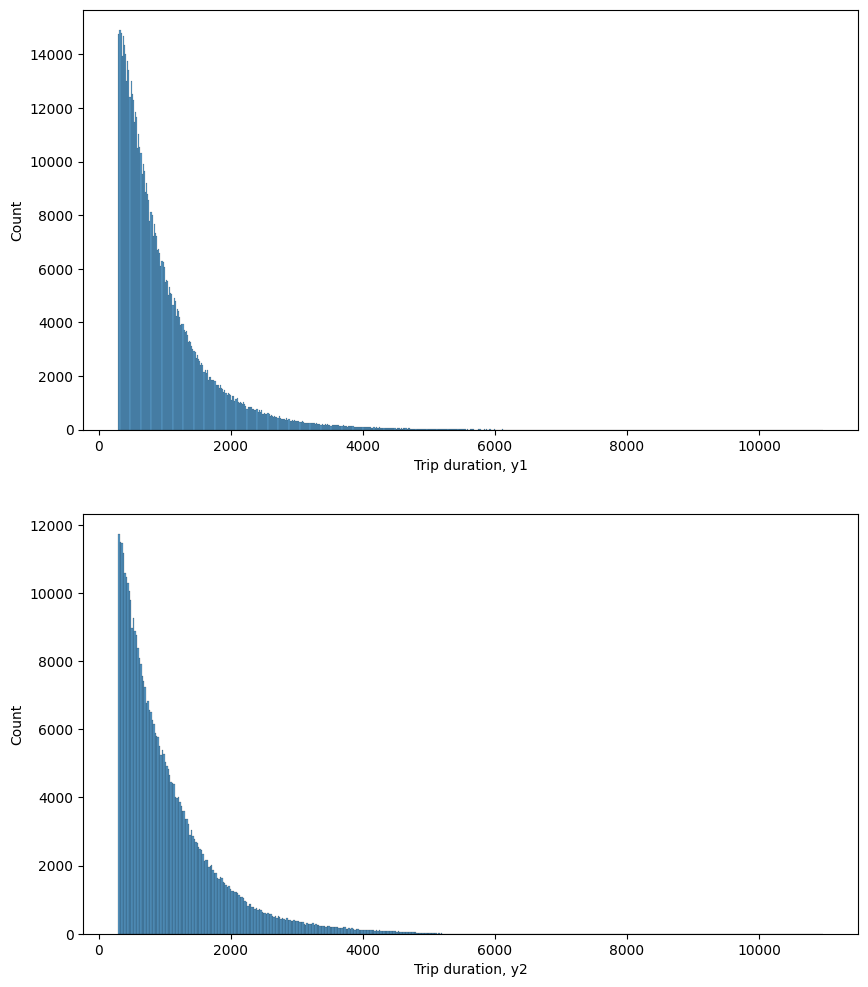

In [174]:
fig, axes = plt.subplots(figsize=(10, 12), nrows=2)

sns.histplot(y1, ax=axes[0])
axes[0].set_xlabel('Trip duration, y1')

sns.histplot(y2, ax=axes[1])
axes[1].set_xlabel('Trip duration, y2')
plt.show()

Как видим, распределние нашего таргета достаточно сильно смещено, попробуем прологарифмировать таргет и посмотрим на новое распределение

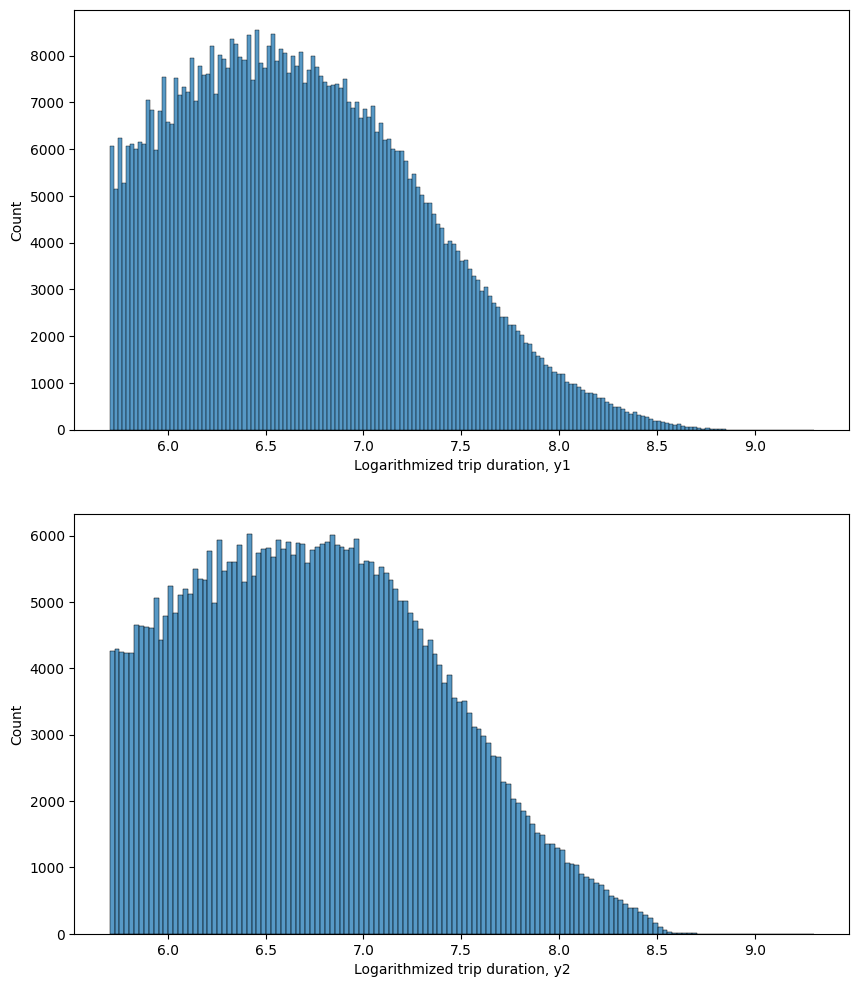

In [175]:
fig, axes = plt.subplots(figsize=(10, 12), nrows=2)

sns.histplot(np.log(y1), ax=axes[0])
axes[0].set_xlabel('Logarithmized trip duration, y1')

sns.histplot(np.log(y2), ax=axes[1])
axes[1].set_xlabel('Logarithmized trip duration, y2')
plt.show()

Данные подготовлены.

## Обучение моделей

Сначала произведем train-test split наших данных.

In [176]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.2)

Теперь обучим наши модели.

In [177]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

Проанализируем результат при помощи RMSE.

In [178]:
from sklearn.metrics import root_mean_squared_error, r2_score

print('First model result:', root_mean_squared_error(y1_test, y1_pred))
print('Second model result:', root_mean_squared_error(y2_test, y2_pred))
print('R2 score:', r2_score(y2_test, y2_pred))

First model result: 355.48216547904985
Second model result: 350.4173865079932
R2 score: 0.7789231511958157


Теперь попробуем с прологарифмированными таргетами и сравним результаты

In [179]:
model1_log = LinearRegression()
model1_log.fit(X1_train, np.log(y1_train))
y1_log_pred = np.exp(model1_log.predict(X1_test))

model2_log = LinearRegression()
model2_log.fit(X2_train, np.log(y2_train))
y2_log_pred = np.exp(model1_log.predict(X2_test))

print('First model result:', root_mean_squared_error(y1_test, y1_log_pred))
print('Second model result:', root_mean_squared_error(y2_test, y2_log_pred))
print('R2 score:', r2_score(y2_test, y2_log_pred))

First model result: 1122.7468420881778
Second model result: 909.1600811157192
R2 score: -0.4881704975526622


Как видим, логарифмирование ухудшило результат RMSE

## Подготовка submission


In [181]:
sub_df = pd.read_csv(VALIDATION_FILE_PATH)
sub_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [182]:
sub_df['pickup_datetime'] = pd.to_datetime(sub_df['pickup_datetime'])
sub_df['month'] = sub_df['pickup_datetime'].dt.month

sub_df['pick_hours'] = sub_df['pickup_datetime'].dt.hour

In [185]:
sub_df1 = sub_df.copy()
sub_df1['distance'] = np.abs(sub_df1['dropoff_latitude'] - sub_df1['pickup_latitude']) * 111.32 + \
                        np.abs(sub_df1['dropoff_longitude'] - sub_df1['pickup_longitude']) * 111.32 * np.cos(sub_df1['pickup_latitude'] * np.pi / 180)

sub_df1 = sub_df1.drop(columns=[
    'pickup_datetime',
    'passenger_count',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'store_and_fwd_flag'
])

sub_df1

,id,vendor_id,month,pick_hours,distance
0,id3004672,1,6,23,2.916580
1,id3505355,1,6,23,3.108298
2,id1217141,1,6,23,1.848417
3,id2150126,2,6,23,7.171404
4,id1598245,1,6,23,1.355687
...,...,...,...,...,...
625129,id3008929,1,1,0,1.137028
625130,id3700764,1,1,0,8.772676
625131,id2568735,1,1,0,9.313213
625132,id1384355,1,1,0,27.924872


In [186]:
sub_df2 = sub_df.copy()
sub_df2['distance'] = sub_df2.apply(pd_great_circle, axis=1)

sub_df2 = sub_df2.drop(columns=[
    'pickup_datetime',
    'passenger_count',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'store_and_fwd_flag'
])

sub_df2

,id,vendor_id,month,pick_hours,distance
0,id3004672,1,6,23,2.746430
1,id3505355,1,6,23,2.759243
2,id1217141,1,6,23,1.306157
3,id2150126,2,6,23,5.269095
4,id1598245,1,6,23,0.960843
...,...,...,...,...,...
625129,id3008929,1,1,0,0.967439
625130,id3700764,1,1,0,6.196352
625131,id2568735,1,1,0,8.153731
625132,id1384355,1,1,0,20.380777


In [190]:
id = sub_df['id']

X1 = sub_df1.drop(columns='id')
prediction1 = model1.predict(X1)
output1 = pd.DataFrame()
output1.index = id
output1['trip_duration'] = prediction1
output1.to_csv("./submission1.csv")

X2 = sub_df2.drop(columns='id')
prediction2 = model2.predict(X2)
output2 = pd.DataFrame()
output2.index = id
output2['trip_duration'] = prediction2
output2.to_csv("./submission2.csv")

output1, output2

(           trip_duration
 id                      
 id3004672     656.973645
 id3505355     675.705336
 id1217141     552.608880
 id2150126    1075.131422
 id1598245     504.466722
 ...                  ...
 id3008929     341.725987
 id3700764    1087.766032
 id2568735    1140.579208
 id1384355    2959.029197
 id0621643     907.277507
 
 [625134 rows x 1 columns],
            trip_duration
 id                      
 id3004672     654.061781
 id3505355     655.615132
 id1217141     479.455747
 id2150126     963.935875
 id1598245     437.592892
 ...                  ...
 id3008929     278.425579
 id3700764     912.333278
 id2568735    1149.628730
 id1384355    2631.928870
 id0621643     884.337084
 
 [625134 rows x 1 columns])